<a href="https://colab.research.google.com/github/bhadauriaankit/Suicide-detection-using-ml/blob/main/Suicide_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install neattext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 1.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import neattext as nfx
import plotly.express as plx
from sklearn.metrics import classification_report
import keras
from keras.layers import Embedding,Dense,LSTM,GlobalMaxPooling1D,Input
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.models import Sequential
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

data = pd.read_csv("/content/drive/My Drive/Suicide_Detection.csv")

In [ ]:
data['class'].value_counts()

class
suicide        116037
non-suicide    116037
Name: count, dtype: int64

In [ ]:
data['class'].value_counts().index.values


array(['suicide', 'non-suicide'], dtype=object)

In [ ]:
train_data,test_data =train_test_split(data,test_size =0.2,random_state =10)

In [ ]:
train_data['class'].value_counts().index.values

array(['suicide', 'non-suicide'], dtype=object)

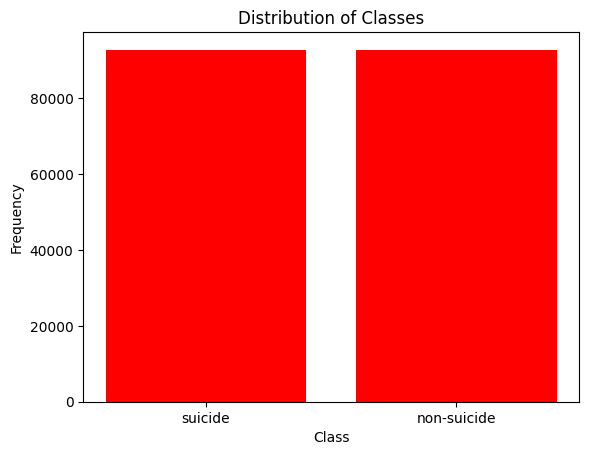

In [ ]:
import matplotlib.pyplot as plt
class_counts = train_data['class'].value_counts()
colors = ['blue' if cls == 'Suicide' else 'red' for cls in class_counts.index]
plt.bar(train_data['class'].value_counts().index.values, train_data['class'].value_counts(), color=colors)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Classes')
plt.show()

In [ ]:
def clean_text(text):
  text_length =[]
  cleaned_text =[]
  for sent in tqdm(text):
    sent =sent.lower()
    sent =nfx.remove_special_characters(sent)
    sent =nfx.remove_stopwords(sent)
    text_length.append(len(sent.split()))
    cleaned_text.append(sent)
  return cleaned_text,text_length

In [ ]:
cleaned_train_text,train_text_length=clean_text(train_data.text)
cleaned_test_text,test_text_length=clean_text(test_data.text)

100%|██████████| 46415/46415 [00:02<00:00, 16580.72it/s]


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(cleaned_train_text)

In [ ]:
train_text_seq =tokenizer.texts_to_sequences(cleaned_train_text)
train_text_pad = pad_sequences(train_text_seq,maxlen=50)

test_text_seq =tokenizer.texts_to_sequences(cleaned_test_text)
test_text_pad =pad_sequences(test_text_seq,maxlen=50)


In [ ]:
train_text_seq

[[436, 3985, 1618, 1272, 129, 5574, 176, 3027, 3],
 [1585, 14877, 1585, 14877, 170, 250, 163, 508, 1642],
 [7413,
  59216,
  134,
  8,
  1560,
  2,
  3,
  9,
  87751,
  60,
  62,
  2,
  6,
  3,
  1341,
  2,
  5,
  4,
  5,
  10,
  297,
  32,
  51,
  1843,
  2,
  5,
  1,
  586,
  360,
  8894,
  105,
  221,
  8,
  89,
  157,
  60,
  1,
  588,
  1321,
  15,
  1767,
  423,
  6,
  96,
  77,
  240,
  96],
 [4,
  1335,
  2602,
  5346,
  2730,
  395,
  2632,
  1345,
  1,
  650,
  1739,
  217,
  782,
  775,
  2509,
  3414,
  444],
 [87752,
  44,
  9,
  597,
  826,
  28,
  260,
  771,
  717,
  826,
  1359,
  183,
  18034,
  6,
  78,
  29,
  316,
  10,
  1,
  29,
  1231,
  521,
  4313,
  28,
  168,
  1,
  737,
  19,
  582,
  294,
  10409,
  116,
  10044,
  5,
  11317,
  996,
  2480,
  4612,
  300,
  47209,
  178,
  1,
  18662,
  12,
  2497,
  36,
  24245,
  197,
  140,
  5468,
  1990,
  4791,
  4235,
  57,
  16,
  147,
  6,
  96,
  969,
  2095,
  28,
  115,
  771,
  752,
  114,
  19,
  65,
  119,


In [ ]:
train_text_pad

array([[   0,    0,    0, ...,  176, 3027,    3],
       [   0,    0,    0, ...,  163,  508, 1642],
       [   0,    0,    0, ...,   77,  240,   96],
       ...,
       [   0,    0,    0, ...,  328,    2,    4],
       [   0,    0,    0, ...,   65,   26,   16],
       [   4,   46,   25, ...,    2,    4,   16]], dtype=int32)

globe

In [ ]:
lbl_target = LabelEncoder()
train_output = lbl_target.fit_transform(train_data['class'])
test_output = lbl_target.transform(test_data['class'])

In [ ]:
import pickle

In [ ]:
with open("/content/drive/My Drive/glove.840B.300d.pkl", "rb") as fp:
    glove_embedding = pickle.load(fp)

In [ ]:
v=len(tokenizer.word_index)
embedding_matrix=np.zeros((v+1,300),dtype=float)
for word,idx in tokenizer.word_index.items():
  embedding_vector = glove_embedding.get(word)
  if embedding_vector is not None:
    embedding_matrix[idx]=embedding_vector

In [ ]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.074482  ,  0.58293003, -0.78233999, ..., -0.24984001,
        -0.096953  ,  0.66692001],
       [-0.35394999,  0.23051   , -0.62689   , ..., -0.20720001,
         0.52003002,  0.51129001],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.29547   , -0.21822999, -0.039817  , ...,  0.62642998,
         0.48798001, -0.47554001],
       [ 0.75085002, -0.35099   ,  0.37674999, ..., -0.066863  ,
         0.79632998, -0.05967   ]])

In [ ]:
early_stop =EarlyStopping(patience=5)
reducelr =ReduceLROnPlateau(patience=3)

In [ ]:
model = Sequential()
model.add(Input(shape=(50,)))
model.add(Embedding(v+1,300,weights=[embedding_matrix],trainable=False))
model.add(LSTM(20,return_sequences=True))
model.add(GlobalMaxPooling1D())
model.add(Dense(256,activation ='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer =keras.optimizers.SGD(learning_rate=0.1,momentum=0.09),loss = 'binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 300)           81560700  
                                                                 
 lstm (LSTM)                 (None, 50, 20)            25680     
                                                                 
 global_max_pooling1d (Glob  (None, 20)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 256)               5376      
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 81592013 (311.25 MB)
Trainable params: 31313 (122.32 KB)
Non-trainable params: 81560700 (311.13 MB)
________

In [ ]:
train_text_pad.shape, train_output.shape, test_text_pad.shape, test_output.shape

((185659, 50), (185659,), (46415, 50), (46415,))

In [ ]:
r = model.fit(train_text_pad, train_output, validation_data=(test_text_pad, test_output),
              epochs=1, batch_size=256, callbacks=[early_stop, reducelr])

726/726 [==============================] - 74s 102ms/step - loss: 0.2431 - accuracy: 0.9029 - val_loss: 0.2293 - val_accuracy: 0.9099 - lr: 0.1000


In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(type(model))

<class 'keras.src.engine.sequential.Sequential'>


In [ ]:
print(test_output.dtype)
print(model.predict(test_text_pad).dtype)

print(train_output.dtype)
print(model.predict(train_text_pad).dtype)

int64
1451/1451 [==============================] - 20s 14ms/step
float32
int64
5802/5802 [==============================] - 54s 9ms/step
float32


In [ ]:
  twt = ['i am happy']
  twt = tokenizer.texts_to_sequences(twt)
  twt = pad_sequences(twt,maxlen =50)

  prediction = model.predict(twt)[0][0]
  print (prediction)

  if(prediction  >0.5):
    print ("Potential Suicide Post")
  else:
    print("Non Suicide Post")


1/1 [==============================] - 0s 31ms/step
0.3176606
Non Suicide Post


In [ ]:
pickle.dump(tokenizer, open('tokenizer.pkl','wb'))

In [ ]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save('my_model.keras')

In [ ]:
token_form = pickle.load(open('tokenizer.pkl','rb'))

In [ ]:
from keras.models import load_model

In [ ]:
model_form = load_model("model.h5")

In [ ]:
twt = ['i am sad ']
twt = token_form.texts_to_sequences(twt)
twt = pad_sequences(twt,maxlen =50)


prediction = model_form.predict(twt)[0][0]
print(prediction)


if(prediction  >0.5):
    print ("Potential Suicide Post")
elif(prediction ==1):
    print("Non Suicide Post")


1/1 [==============================] - 1s 743ms/step
0.3354092


In [ ]:
tf.keras.models.save_model(model,'my_mofrl2.hdf5')

<ipython-input-42-33f46f699bff>:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model,'my_mofrl2.hdf5')


In [ ]:
model.save("/content/abc/model.h5")


In [ ]:
file_path = '/content/app.py'


In [ ]:
! pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.0 MB/s eta 0:00:00


In [ ]:
import requests

response = requests.get('http://ipv4.icanhazip.com')
if response.status_code == 200:
    print("Your public IPv4 address is:", response.text.strip())
else:
    print("Failed to retrieve the IPv4 address.")


Your public IPv4 address is: 35.186.175.173


In [ ]:
%%writefile app.py
import streamlit as st
import pickle
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
import plotly.express as px
import pandas as pd
import pickle

# Specify the correct path to tokenizer.pkl
tokenizer_path = 'tokenizer.pkl'

# Load tokenizer from file
try:
    with open(tokenizer_path, 'rb') as tokenizer_file:
        token_form = pickle.load(tokenizer_file)
except FileNotFoundError:
    print(f"Error: '{tokenizer_path}' not found.")
    # Handle the error gracefully

token_form = pickle.load(open('tokenizer.pkl', 'rb'))
model = load_model("model.h5")

if __name__ == '__main__':
    st.title('Suicidal Post Detection App ')
    st.subheader("Input the Post content below")
    sentence = st.text_input("Enter your post content here")
    predict_btt = st.button("Predict")

    if predict_btt:

        st.write("Post: " +sentence)
        twt = [sentence]
        twt = token_form.texts_to_sequences(twt)
        twt = pad_sequences(twt, maxlen=50)

        prediction = model.predict(twt)[0][0]

        if(prediction > 0.5):
             st.warning("Potential Suicide Post")
        else:
            st.success("Non Suicide Post")
        class_label = ["Potential Suicide Post","Non Suicide Post"]
        prob_list = [prediction*100,100-prediction*100]
        prob_dict = {"Potential Suicide Post/Non Suicide Post":class_label,"Probability":prob_list}
        df_prob = pd.DataFrame(prob_dict)
        fig = px.bar(df_prob, x='Potential Suicide Post/Non Suicide Post', y='Probability')
        model_option = "LSTM+GLove"
        if prediction > 0.5:
            fig.update_layout(title_text="{} model - prediction probability comparison between Potential Suicide Post and Non Suicide Post".format(model_option))
            st.info("The {} model predicts that there is a higher {} probability that the post content is Potential Suicide Post compared to a {} probability of being Non Suicide Post".format(model_option,prediction*100,100-prediction*100))
        else:
            fig.update_layout(title_text="{} model - prediction probability comparison between Potential Suicide Post and Non Suicide Post".format(model_option))
            st.info("Your post content is rather abstract, The {} model predicts that there a almost equal {} probability that the post content is Potential Suicide Post compared to a {} probability of being Non Suicide Post".format(model_option,prediction*100,100-prediction*100))
        st.plotly_chart(fig, use_container_width=True)

Overwriting app.py


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501



npx: installed 22 in 5.962s
your url is: https://metal-dragons-start.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.186.175.173:8501

2024-04-22 18:19:45.651158: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-22 18:19:45.651233: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-22 18:19:45.653976: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-22 18:19:47.620765: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-04-22 18:19:51.36